In [1]:
import numpy as np 
import os 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats

In [2]:
data_dir1 = "./Dataset Version 1/jester-data-1.xls"
data_dir2 = "./Dataset Version 1/jester-data-2.xls"
data_dir3 = "./Dataset Version 1/jester-data-3.xls"

df1 = pd.read_excel(data_dir1, header=None)
df2 = pd.read_excel(data_dir2, header=None)
df3 = pd.read_excel(data_dir3, header=None)
df = df1.append(df2).append(df3)

# df = pd.DataFrame(pd.read_excel(data_dir))

In [3]:
df.index = range(df.shape[0])
df.index.name = "User ID"
col_names = ["joke"+str(i) for i in range(1, df.shape[1])]
df.columns = ["NumRated"] + col_names
df[df==99.0] = np.nan
df = df.loc[:, df.columns != "NumRated"]
df.head(6)

,joke1,joke2,joke3,joke4,joke5,joke6,joke7,joke8,joke9,joke10,...,joke91,joke92,joke93,joke94,joke95,joke96,joke97,joke98,joke99,joke100
User ID,,,,,,,,,,,,,,,,,,,,,
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45


In [4]:
#normalization
def normalize_data(dataframe): 
    mean_data = dataframe.sum(axis=1, numeric_only=True)/dataframe.count(1)
    print(mean_data[2])
    return dataframe.subtract(mean_data, axis='rows')
normalized_df = normalize_data(df)
normalized_df.head(6)

7.099387755102041


,joke1,joke2,joke3,joke4,joke5,joke6,joke7,joke8,joke9,joke10,...,joke91,joke92,joke93,joke94,joke95,joke96,joke97,joke98,joke99,joke100
User ID,,,,,,,,,,,,,,,,,,,,,
0,-4.388108,12.221892,-6.228108,-4.728108,-4.088108,-5.068108,-6.418108,7.601892,-5.548108,-1.328108,...,6.251892,NaN,NaN,NaN,NaN,NaN,-2.198108,NaN,NaN,NaN
1,1.333700,-3.036300,3.613700,1.623700,-5.126300,-12.406300,-3.476300,-8.086300,6.133700,6.473700,...,0.073700,-7.696300,-3.036300,5.113700,-2.936300,-4.886300,0.313700,-2.406300,-7.066300,-1.676300
2,NaN,NaN,NaN,NaN,1.930612,2.170612,1.930612,2.170612,NaN,NaN,...,NaN,NaN,NaN,1.980612,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,5.691875,NaN,NaN,-0.858125,5.501875,-5.478125,3.551875,NaN,-0.818125,...,NaN,NaN,NaN,-2.128125,NaN,NaN,NaN,NaN,NaN,NaN
4,5.247363,1.357363,-7.422637,-8.642637,-1.892637,-1.652637,3.787363,1.357363,-3.692637,2.477363,...,1.937363,2.327363,1.017363,1.937363,2.477363,-1.702637,-0.142637,3.297363,-1.452637,-1.652637
5,-1.272300,1.357700,5.337700,-3.602300,-2.192300,0.577700,-3.792300,4.027700,-1.752300,3.097700,...,1.357700,-1.992300,4.217700,1.937700,2.717700,1.547700,4.947700,-4.182300,-0.152300,1.447700


[Text(0,0.5,u'Count'), Text(0.5,0,u'Mean rating per user')]

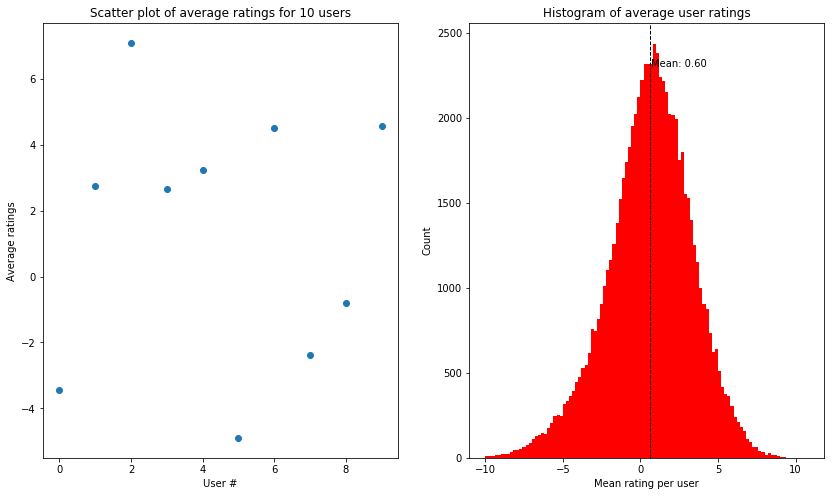

In [5]:
avg_joke_rating = np.nanmean(df,axis=0)
each_user_avg = np.nanmean(df,axis=1)
fig=plt.figure(figsize=(14,8)) 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax2.hist(each_user_avg, np.arange(-10,11,0.2), color = "red")
ax1.scatter(np.arange(0,10),each_user_avg[:10])
ax1.set_title('Scatter plot of average ratings for 10 users')
ax1.set(xlabel='User #', ylabel='Average ratings')
ax2.set_title('Histogram of average user ratings')
ax2.axvline(each_user_avg.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
ax2.text(each_user_avg.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(each_user_avg.mean()))
ax2.set(xlabel='Mean rating per user', ylabel='Count')

### Below is the content based filtering, it requires content of the joke so we added joke content searched from the internet.

In [6]:
joke_content_path = "./Dataset Version 1/jester_content.xlsx"
df_joke = pd.read_excel(joke_content_path, header=None)
num_jokes, _ = df_joke.values.shape
# Convert all jokes to string
joke_list = list()
feature_length = 512
from collections import defaultdict
words_dict = defaultdict(int)
for index in range(num_jokes):
    joke = df_joke.values[index, 0]
    words = joke.split()
    for each_word in words:
        words_dict[each_word] += 1

words_count_dict = {k:v for k, v in sorted(words_dict.items(), key=lambda x: x[1], reverse=True)[0:feature_length]}
idx = 0
print(len(words_dict))
words_id = {}
for word, count in words_count_dict.items():
    words_id[word] = idx
    idx += 1


2159


In [7]:
# For each joke in the joke list, provide a 128-dim feature to the joke as the profile
import numpy as np
joke_profile_dict = dict()
for index in range(num_jokes):
    joke = df_joke.values[index, 0]
    profile = np.zeros(feature_length)
    for each_word in joke.split():
        if each_word in words_id.keys():
            profile[words_id[each_word]] += 1
    joke_profile_dict[index] = profile

### There are jokes, and the user only read 80 jokes and 20 are unknown, we should recommend top unseen jokes form the reamining 20 jokes

In [8]:
# Content based filtering, we collect the score of one user of all jokes he reviewed and generate a user profile
new_user = df.iloc[46].copy() 
start_idx = 20
user_profile = np.zeros(feature_length)
num_jokes_used = 0
for joke_index in range(start_idx, num_jokes):
    joke_profile = joke_profile_dict[joke_index]
    rating = new_user[joke_index]
    if not -10 < rating < 10:
        continue
    num_jokes_used += 1
    user_profile += rating * joke_profile
user_profile /= num_jokes_used
# Compute the cosine distance with all joke profiles
unseen_jokes = [joke_profile_dict[index] for index in range(0, start_idx) if new_user[index] <= 10]
unseen_jokes = np.stack(unseen_jokes)
print(unseen_jokes)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
# Number of jokes we want to recommand
num_recommand = 5
unseen_joke_norm = np.linalg.norm(unseen_jokes, ord=2, axis=1)
user_profile_norm = np.linalg.norm(user_profile, ord=2)
# Calculate the cosine similarity
cos_similarity = np.sum(np.multiply(unseen_jokes, user_profile), axis=1)/(unseen_joke_norm * user_profile_norm)
recommended_jokes = np.argsort(cos_similarity)[::-1][:num_recommand]
scores = new_user[recommended_jokes]
scores_all = new_user[[i for i in range(0, start_idx) if new_user[i] <= 10]]
print("Recommended Jokes: ", recommended_jokes)
print('Actual Scores from this user: ')
print(scores)
print("Entire Joke Scores from this user (Suppose he never see it)")
print(scores_all)

('Recommended Jokes: ', array([ 5,  8, 13, 11, 19], dtype=int64))
Actual Scores from this user: 
joke6     8.88
joke9    -8.45
joke14    8.54
joke12    8.06
joke20    6.50
Name: 46, dtype: float64
Entire Joke Scores from this user (Suppose he never see it)
joke1     8.45
joke2     3.35
joke3     7.77
joke4     2.77
joke5     1.80
joke6     8.88
joke7     8.59
joke8    -9.85
joke9    -8.45
joke10    3.98
joke11    8.50
joke12    8.06
joke13   -9.56
joke14    8.54
joke15   -9.85
joke16   -9.66
joke17    2.23
joke18   -1.70
joke19    4.08
joke20    6.50
Name: 46, dtype: float64


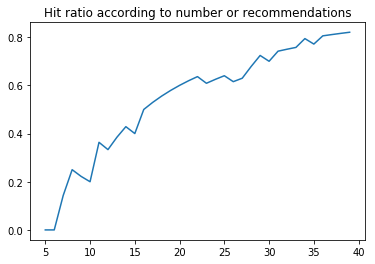

In [28]:
# Add some visualizations
# The result is visualzied by hit ratio, 
hit_ratio_list = []
num_recommend_list = []
num_unknown = 50
for num_recommand in range(5, num_unknown - 10):
    #num_unknown = 50 #num_recommand * 2

    new_user = df.iloc[46].copy() 
    start_idx = num_unknown
    user_profile = np.zeros(feature_length)
    num_jokes_used = 0
    for joke_index in range(start_idx, num_jokes):
        joke_profile = joke_profile_dict[joke_index]
        rating = new_user[joke_index]
        if not -10 < rating < 10:
            continue
        num_jokes_used += 1
        user_profile += rating * joke_profile
    user_profile /= num_jokes_used
    # Compute the cosine distance with all joke profiles
    unseen_jokes = [joke_profile_dict[index] for index in range(0, start_idx) if new_user[index] <= 10]
    unseen_jokes = np.stack(unseen_jokes)
    unseen_joke_norm = np.linalg.norm(unseen_jokes, ord=2, axis=1)
    user_profile_norm = np.linalg.norm(user_profile, ord=2)
    # Calculate the cosine similarity
    cos_similarity = np.sum(np.multiply(unseen_jokes, user_profile), axis=1)/(unseen_joke_norm * user_profile_norm)
    
    # Calculate the hit ratio
    recommended_jokes = np.argsort(cos_similarity)[::-1][:num_recommand]
    scores_all = new_user[[i for i in range(0, start_idx) if -10 <= new_user[i] <= 10]]
    ground_truth = np.argsort(scores_all)[::-1][:num_recommand]
    hit_ratio = float(np.intersect1d(recommended_jokes, ground_truth).shape[0])/ num_recommand
    hit_ratio_list.append(hit_ratio)
    num_recommend_list.append(num_recommand)

import matplotlib.pyplot as plt
plt.plot(num_recommend_list, hit_ratio_list)
plt.title("Hit ratio according to number or recommendations")
plt.show()

### From figure above we can see that with the increase of number of recommendations. If the number of jokes the user have never seen is fixed. Then the hit ratio is increased when the number of recommendations is increased

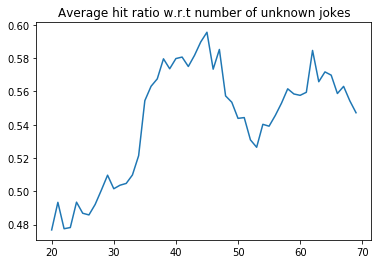

In [29]:
# Add some visualizations
# The result is visualzied by hit ratio, 

num_unknown_list = []
mean_ratio_list = []
#num_unknown = 50

for num_unknown in range(20, 70):
    hit_ratio_list = []
    num_recommend_list = []
    for num_recommand in range(5, num_unknown - 10):
        new_user = df.iloc[46].copy() 
        start_idx = num_unknown
        user_profile = np.zeros(feature_length)
        num_jokes_used = 0
        for joke_index in range(start_idx, num_jokes):
            joke_profile = joke_profile_dict[joke_index]
            rating = new_user[joke_index]
            if not -10 <= rating <= 10:
                continue
            num_jokes_used += 1
            user_profile += rating * joke_profile
        user_profile /= num_jokes_used
        # Compute the cosine distance with all joke profiles
        unseen_jokes = [joke_profile_dict[index] for index in range(0, start_idx) if new_user[index] <= 10]
        unseen_jokes = np.stack(unseen_jokes)
        unseen_joke_norm = np.linalg.norm(unseen_jokes, ord=2, axis=1)
        user_profile_norm = np.linalg.norm(user_profile, ord=2)
        # Calculate the cosine similarity
        cos_similarity = np.sum(np.multiply(unseen_jokes, user_profile), axis=1)/(unseen_joke_norm * user_profile_norm)
        # Calculate the hit ratio
        recommended_jokes = np.argsort(cos_similarity)[::-1][:num_recommand]
        scores_all = new_user[[i for i in range(0, start_idx) if -10 <= new_user[i] <= 10]]
        ground_truth = np.argsort(scores_all)[::-1][:num_recommand]
        hit_ratio = float(np.intersect1d(recommended_jokes, ground_truth).shape[0])/ num_recommand
        hit_ratio_list.append(hit_ratio)
        num_recommend_list.append(num_recommand)
    num_unknown_list.append(num_unknown)
    mean_ratio_list.append(np.mean(hit_ratio_list))

import matplotlib.pyplot as plt
plt.plot(num_unknown_list, mean_ratio_list)
plt.title("Average hit ratio w.r.t number of unknown jokes")
plt.show()

### From above figure we can see when the number of unknown jokes is not too many nor too little like ~40. The hit ratio is the highest. If the number of unknown is too small, then the number of recommandation cannot be high so the hit ratio cannot be high due to number of unknown is small.